In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
pip install scikit-learn==1.3.0


In [50]:
df = pd.read_csv('diabetes.csv')

In [51]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot: >

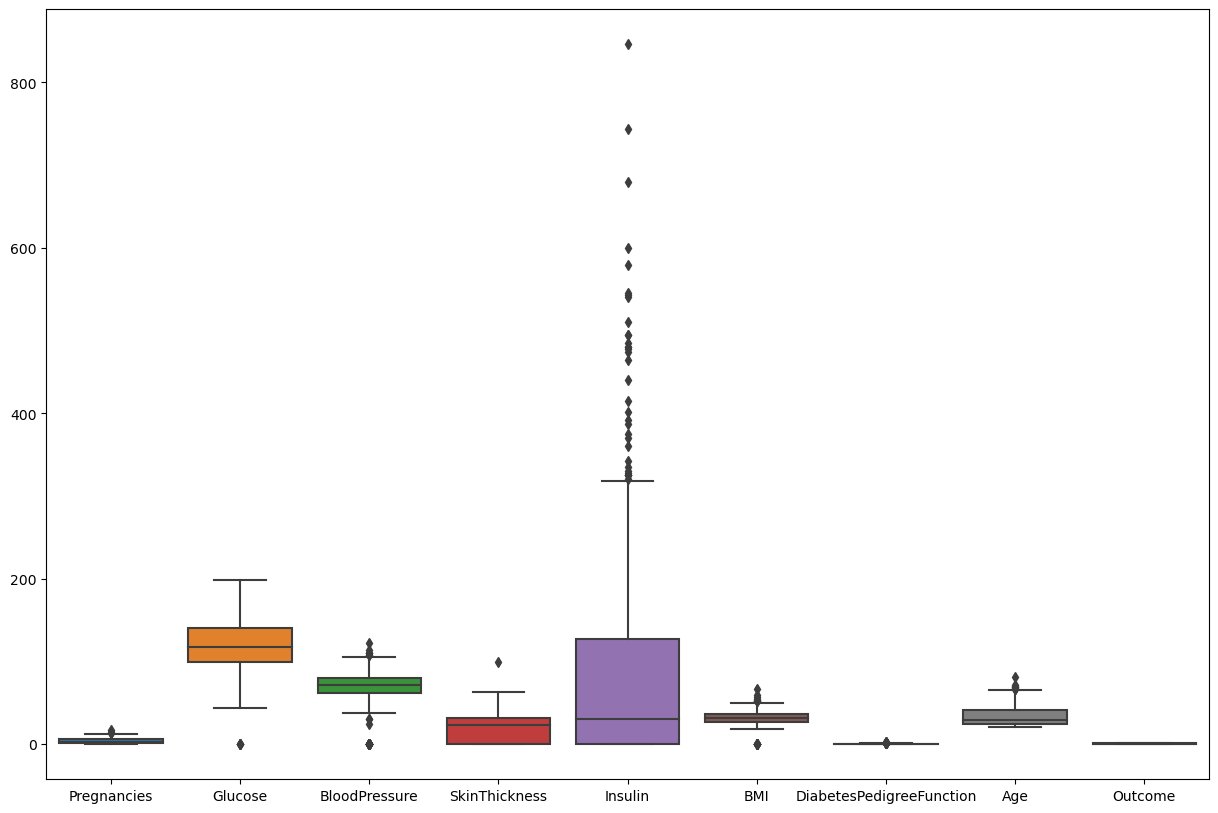

In [52]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [54]:
df['Insulin'] = df['Insulin'].astype(float)

In [55]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure' ].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin' ] = df['Insulin' ].replace(0,df['Insulin'].median())
df['SkinThickness' ] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [56]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.0,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,30.5,30.1,0.349,47,1


In [ ]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
import pickle
def scaling(X_train,X_test):
    scale = StandardScaler()
    scaled_train = scale.fit_transform(X_train)
    scaled_test = scale.transform(X_test)
    
    pickle.dump(scale,open('scale3.pkl','wb'))
    return scaled_train,scaled_test
scaled_train,scaled_test = scaling(X_train,X_test)

In [13]:
parameter={
'criterion': ['gini','entropy', 'log_loss' ],
'splitter': ['best', 'random' ],
'max_depth': [1,2,3,4,5],
'max_features': ['auto', 'sqrt', 'log2' ]}

In [14]:
dt = DecisionTreeClassifier()

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
gcv = GridSearchCV(dt,param_grid=parameter,cv=5,scoring='accuracy')

In [17]:
import warnings
warnings.filterwarnings('ignore')
gcv.fit(scaled_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [18]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [19]:
dt = DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='auto',splitter='best')

In [20]:
dt.fit(scaled_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='auto')

In [21]:
y_pred = dt.predict(scaled_test)

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,y_pred),accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       123
           1       0.57      0.43      0.49        69

    accuracy                           0.68       192
   macro avg       0.64      0.62      0.63       192
weighted avg       0.66      0.68      0.67       192
 0.6770833333333334


In [24]:
print(confusion_matrix(y_test,y_pred))

[[100  23]
 [ 39  30]]


In [25]:
pickle.dump(dt,open('dt.pkl','wb'))

SVC -- 

In [26]:
param_grid ={
'C':[0.1,1,10,100,1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel':['linear'] }

In [27]:
sv_clf = SVC()

In [28]:
gscv = GridSearchCV(sv_clf,param_grid=param_grid,cv=5,scoring='accuracy')

In [29]:
gscv.fit(scaled_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='accuracy')

In [30]:
sv_clf = SVC(C=0.1, gamma=1, kernel='linear')

In [31]:
sv_clf.fit(scaled_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [32]:
y_predict = sv_clf.predict(scaled_test)

In [33]:
print(classification_report(y_test,y_pred),accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       123
           1       0.57      0.43      0.49        69

    accuracy                           0.68       192
   macro avg       0.64      0.62      0.63       192
weighted avg       0.66      0.68      0.67       192
 0.6770833333333334


In [34]:
print(confusion_matrix(y_test,y_pred))

[[100  23]
 [ 39  30]]


In [35]:
pickle.dump(sv_clf,open('svm_clf.pkl','wb'))

NAIVE BAYES -- 

In [36]:
nb_clf = BernoulliNB()

In [37]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],      # Smoothing parameter
    'fit_prior': [True, False],             # Whether to learn class prior probabilities
    'binarize': [0.0, 0.5, 1.0]             # Threshold for binarizing (counting as 0 or 1)
}


In [38]:
g = GridSearchCV(nb_clf,cv=5,param_grid=param_grid,scoring='accuracy')

In [39]:
g.fit(scaled_train,y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
                         'binarize': [0.0, 0.5, 1.0],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [40]:
g.best_estimator_

BernoulliNB(alpha=0.1, binarize=1.0)

In [41]:
nb_clf = BernoulliNB(alpha=0.1, binarize=1.0)

In [42]:
nb_clf.fit(scaled_train,y_train)

BernoulliNB(alpha=0.1, binarize=1.0)

In [43]:
y_pre = nb_clf.predict(scaled_test)

In [44]:
print(classification_report(y_test,y_pred),accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       123
           1       0.57      0.43      0.49        69

    accuracy                           0.68       192
   macro avg       0.64      0.62      0.63       192
weighted avg       0.66      0.68      0.67       192
 0.6770833333333334


In [45]:
print(confusion_matrix(y_test,y_pre))

[[96 27]
 [31 38]]


In [46]:
pickle.dump(nb_clf,open('nb_clf.pkl','wb'))